1. The following table shows the annual atmospheric CO2 concentration (in parts permillion) in Antarctica. Fit a straight line to the data and determine the average increase of the concentration per year.

| Year | 1994| 1995| 1996 |1997 | 1998| 1999| 2000| 2001|
| ---  |  --- |  --- | ---  |  --- |  --- |  --- | ---  | --- |
|ppm |356.8 | 358.2 |360.3 |361.8| 364.0| 365.7 |366.7| 368.2|
    
|Year| 2002| 2003 |2004 |2005 |2006| 2007 |2008 |2009|
| ---  |  --- |  --- | ---  |  --- |  --- |  --- | ---  | --- |
|ppm |370.5 |372.2 |374.9 |376.7| 378.7 |381.0|382.9| 384.7|

The average increase of the concentration per year is 1.872205882352939


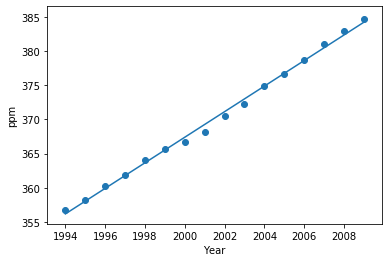

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Year = np.array([1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
ppm = np.array([356.8,358.2,360.3,361.8,364.0,365.7,366.7,368.2,370.5,372.2,374.9,376.7,378.7,381.0,382.9,384.7])

def linearFit(x, y):
    '''
    Fit data x,y by linear function y = ax + b
    '''
    xavg = x.mean()
    a = (y * (x-xavg)).sum()/(x * (x-xavg)).sum()
    b = y.mean() - a*xavg
    return a,b

a,b = linearFit(Year,ppm)
ppm_fit = a * Year + b
# Plot the original data above the fitting line.
plt.plot(Year,ppm_fit)
plt.scatter(Year,ppm)
plt.xlabel('Year')
plt.ylabel('ppm')
print('The average increase of the concentration per year is {}'.format(a))

2. Implement the method of normal equations to determine $a$ and $b$ for which $f (x) = a \sin(\pi x/2) +b \cos(\pi x/2)$ fits the following data in the least-squares sense.
   

|x |−0.5| −0.19| 0.02| 0.20 |0.35 |0.50|
| ---  |  --- |  --- | ---  |  --- |  --- |  --- |    
|y| −3.558| −2.874| −1.995| −1.040 |−0.068| 0.677|

    Compare your results with those from QR factorization. 

a = 3.0384905309506665, b = -2.0495596632192288
S = 0.013634965327218014


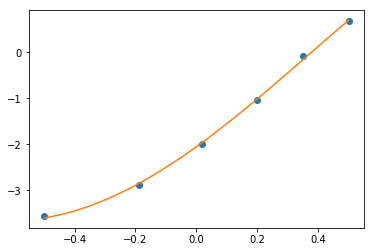

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(index,x):  #f_i (sin(x) cos(x))
    if index == 0:
        return np.sin(np.pi*x / 2)
    else:
        return np.cos(np.pi*x / 2)
    
x = np.array([-0.5,-0.19,0.02,0.20,0.35,0.50])
y = np.array([-3.558,-2.874,-1.995,-1.040,-0.068,0.677])

# A_jk = sum( f_j(x_i)*f_k(x_i) )

A = np.zeros((2,2))
for j in range(2):
    for k in range(2):
        A[j,k] = np.sum( f(j,x) * f(k,x) )
        
# b = sum( f_k(x_i)*y_i )

b = np.array([np.sum(f(0,x)*y),np.sum(f(1,x)*y)])    
a = np.linalg.solve(A,b)
print(f'a = {a[0]}, b = {a[1]}')

plt.plot(x,y,'o')

x1 = np.linspace(np.min(x),np.max(x),100)
plt.plot(x1,a[0]*f(0,x1)+a[1]*f(1,x1))
S = np.sum( (y - a[0]*f(0,x) - a[1]*f(1,x))**2 )
print(f'S = {S}')
plt.show()

Compare with QR method :  
$$a\sin(\pi x_i/2) + b\cos(\pi x_i/2) = y_i$$ 
then
$$
\left[\begin{matrix}
\sin(\pi x_1)& \cos(\pi x_1)\\
\sin(\pi x_2)& \cos(\pi x_2)\\
\vdots& \vdots\\
\sin(\pi x_n)& \cos(\pi x_n)
\end{matrix}\right]\left[
\begin{matrix}
a\\b\end{matrix}
\right]=\left[ \begin{matrix}
y_1\\ y_2\\ \vdots \\y_n
\end{matrix}\right]
$$

a = 1.7922398391888095, b = -2.3995812381037256
S = 64.6528966964903


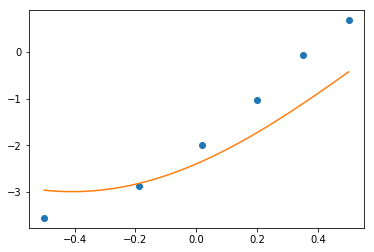

In [46]:
M = np.column_stack( (np.sin(np.pi*x).reshape(6,1),np.cos(np.pi*x).reshape(6,1)) )
Q,R = np.linalg.qr(M)
# R x = Q^T y
a,b = np.linalg.solve(R,Q.T@y)
print(f'a = {a}, b = {b}')

plt.plot(x,y,'o')
plt.plot(x1,a*f(0,x1) + b*f(1,x1))
S = np.sum( (y - a*f(0,x) - a*f(1,x))**2 )
print(f'S = {S}')
plt.show()

$S$ for least-squares sense is much smaller than $S$ for QR factorization, least-squares sense is much better than QR factorization

3. Linear regression can be extended to data that depend on two or more variables (called multiple linear regression). If the dependent variable is $z$ and independent variables are $x$ and $y$, the data to be fitted have the form    


| $x_1$ | $y_1$ |$z_1$ |
| --- | ---| --- |
|$x_2$ | $y_2$ |$z_2$|
| $\vdots$ | $\vdots$| $\vdots$ |
|$x_n$ | $y_n$| $z_n$|   
    
    Instead of a straight line, the fitting function now represents a plane:
$$f (x, y) = a +bx + cy$$
    
    (1) Show that the normal equations for the coefficients are
$$
    \begin{pmatrix}
    n &\sum x_i &\sum y_i\\
    \sum x_i &\sum x_i^2 &\sum x_i y_i\\
    \sum y_i &\sum x_i y_i &\sum y^2_i
    \end{pmatrix}\begin{pmatrix}
    a\\   b\\   c
    \end{pmatrix}=\begin{pmatrix}
    \sum z_i\\
    \sum x_iz_i\\
    \sum y_iz_i\end{pmatrix}
$$

   (2) **Determine** $a,b$ and $c$ to fit the following data:    


|x| y| z|
| --- | ---| --- |
|0| 0 |1.42|
|0 |1 |1.85|
|1 |0 |0.78|
|2 |0 |0.18||
|2 |1| 0.60|
|2| 2| 1.05|

**solution**  
1)$$
S = \sum_{i}\left((z_i - (a+bx_i+cy_i))^2\right)
$$

$$\frac{\partial S}{\partial a} = -\sum_{i}2(z_i-(a+bx_i+cy_i))=0$$
$$\frac{\partial S}{\partial b} = -\sum_{i}2x_i(z_i-(a+bx_i+cy_i))=0$$
$$\frac{\partial S}{\partial c} = -\sum_{i}2y_i(z_i-(a+bx_i+cy_i))=0$$

$$
\begin{align}
\sum_{i}a+\sum_{i}x_ib+\sum_{i}y_ic &= \sum_{i}z_i \\  
\sum_{i}x_ia+\sum_{i}x_i^2b+\sum_{i}x_iy_ic&=\sum_{i}x_iz_i\\
\sum_{i}y_ia+\sum_{i}x_iy_ib+\sum_{i}y_i^2c&=\sum_{i}y_iz_i
\end{align}
$$
So
$$
\begin{pmatrix}
n &\sum x_i &\sum y_i\\
\sum x_i &\sum x_i^2 &\sum x_i y_i\\
\sum y_i &\sum x_i y_i &\sum y^2_i
\end{pmatrix}\begin{pmatrix}
a\\   b\\   c
\end{pmatrix}=\begin{pmatrix}
\sum z_i\\
\sum x_iz_i\\
\sum y_iz_i\end{pmatrix}
$$

2)

a = 1.4132558139534876
b = -0.6213953488372093
c = 0.43755813953488415
S = 0.0003616279069767431


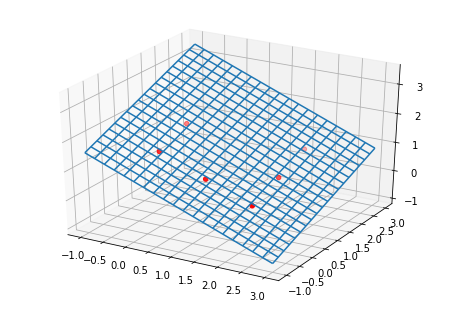

In [49]:
# 2)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


def f(x,y,coff):
    return coff[0]+coff[1]*x+coff[2]*y

x = np.array([0,0,1,2,2,2])
y = np.array([0,1,0,0,1,2])
z = np.array([1.42,1.85,0.78,0.18,0.60,1.05])

M = np.array( [ [len(x),np.sum(x),np.sum(y)],[np.sum(x),np.sum(x**2),np.sum(x*y)],[np.sum(y),np.sum(x*y),np.sum(y**2)] ] )
left = np.array([np.sum(z),np.sum(x*z),np.sum(y*z)])
coff = np.linalg.solve(M,left)
print(f'a = {coff[0]}\nb = {coff[1]}\nc = {coff[2]}')

var = np.column_stack( (np.ones((6,1)),x.reshape(6,1),y.reshape(6,1)) )
S = np.sum((z - var@coff)**2)
print(f'S = {S}')

x1 = np.linspace(-1,3,20)
y1 = np.linspace(-1,3,20)
x1,y1 = np.meshgrid(x1,y1)
fig = plt.figure()
ax3d = Axes3D(fig)
ax3d.scatter(x,y,z,color ='r')
ax3d.plot_wireframe(x1,y1,f(x1,y1,coff))
plt.show()

4. The data, including the uncertainties in the $y$ values, are provided in the data file *absorption_spectrum.txt*. Your task is to fit the function
    $$
    d(t) = A(1 + B\cos\omega t) e^{-t^2/2\tau^2} +C  \tag{1}
    $$
    to the data, where the fitting parameters are $A,B,C, \omega$, and $\tau$.

    (1) **Write** a Python program that 
      - reads the data in from a data file, 
      - defines a function `oscDecay(t, A, B, C, tau, omega)` for the function $d(t)$ above, and 
      - produces a plot of the data and the function $d(t)$.  
    Choose the fitting parameters $A,B, C, \tau$, and $\omega$ to produce an approximate fit "by eye" to the data. You should be able estimate reasonable values for these parameters just by looking at the data and thinking about the behavior of $d(t)$. For example, $d(0) = A(1 + B) + C$ while $d(\infty) = C$. What parameter in $d(t)$ controls the period of the peaks observed in the data? Use that information to estimate the value of that parameter.   

    (2) **Follow** the example `FitSpectrum1.py`, write a program using `scipy.optimize.curve_fit` to fit Eq. (1) to the data and thus find the optimal values of the fitting parameters $A,B,C,\omega$, and $\tau$. Your program should plot the data along with the fitting function using the optimal values of the fitting parameters. Write a function to calculate the reduced $\chi^2$. Print out the value of the reduced $\chi^2$ on your plot along with the optimal values of the fitting parameters. You can use the results from part (1) to estimate good starting values of the fitting parameters.

    (3) **Once** you have found the optimal fitting parameters, run your fitting program again using for starting values the optimal values of the fitting parameters $A,B,C$ and $\tau$, but set the starting value of $\omega$ to be 3 times the optimal value. You should find that the program converges to a different set of fitting parameters than the ones you found in part (2). Using the program you wrote for part (2), make a plot of the data and the fit like the one you did for part (1). The fit should be noticeably worse. What is the value of the reduced $\chi^2$ for this fit? It should be much larger than the one you found for part (2). The program has found a local minimum in $\chi^2$ — one that obviously is not the best fit!

    (4) **Setting** the fitting parameters $A,B,C$ and $\tau$ to the optimal values you found in part (2), plot $\chi^2_r$ as a function of $\omega$ for $\omega$ spanning the range from 0.05 to 3.95. You should observe several local minima for different values of $\chi^2_r$; the global minimum in $\chi^2_r$ should occur for the optimal value of $\omega$ you found in part (2).

The period is controled by omega.


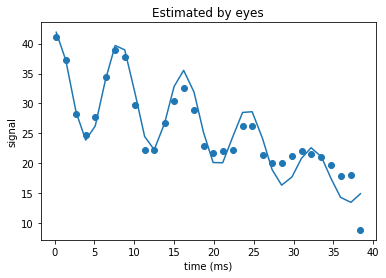

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Read data from data file
t, dt, uncertainty = np.loadtxt("absorption_spectrum.txt", skiprows=4, unpack=True)

def oscDecay(t, A, B, C, tau, omega):
    return A*(1 + B*np.cos(omega*t))*np.exp(-t**2/(2*tau**2)) + C
    
# From the definition of d(t), we can find the period of d(t) is 2pi/omega ~ 8.2, thus omega ~ 0.77
# Then look at the tail of dt, C ~ 8 (for e^{-x^2} diverg at large t).
# The first two zero point of cos(omega*t) gives A*e^{-t^2/tap^2} equals 25,20 (t~1,10). Thus A~25, tao~25
# Finally consider d(0), A(1+B)~34, then B = 0.36

# Plot the estimated data and raw data
estimated = []
for time in t:
    estimated.append(oscDecay(time,25,0.36,8,25,0.77))
plt.scatter(t,dt)
plt.plot(t,estimated)
plt.title('Estimated by eyes')
plt.xlabel('time (ms)')
plt.ylabel('signal')
print('The period is controled by omega.')

Text(0.5, 1.0, '$d(t) = A(1 + B\\cos\\omega t) e^{-t^2/2\\tau^2} +C $')

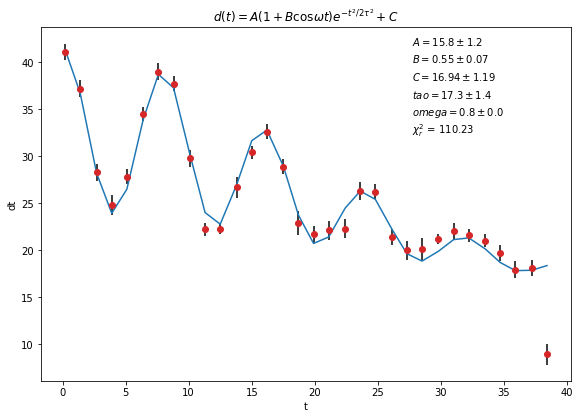

In [47]:
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec  # unequal plots
# fit data using SciPy's Levenberg Marquart method
A0, B0, C0, tau0, omega0 = 25,0.36,8,25,0.77  # use the guessed data in (1) as initialization.
nlfit, nlpcov = curve_fit(oscDecay,t,dt,p0=[A0, B0, C0, tau0, omega0],sigma=uncertainty)
A, B, C, tao, omega = nlfit  # get the optimized parameter
dA, dB, dC, dtao, domega = [np.sqrt(nlpcov[j, j]) for j in range(nlfit.size)]
dt_fit = oscDecay(t, A, B, C, tau, omega)  # estimate with the optimized parameter

# Calculate residuals and reduced chi squared
resids = dt - dt_fit
redchisqr = ((resids / uncertainty) ** 2).sum() #/ float(f.size - 6)

# Create figure window to plot data
fig = plt.figure(1, figsize=(9.5, 6.5))
gs = gridspec.GridSpec(1, 1)

# Top plot: data and fit
ax1 = fig.add_subplot(gs[0])
ax1.plot(t, dt_fit, '-C0')
plt.errorbar(t, dt, yerr=uncertainty, fmt='oC3', ecolor='black')
plt.xlabel('t')
plt.ylabel('dt')
ax1.text(0.7, 0.95, r'$A = {0:0.1f}\pm${1:0.1f}'
         .format(A, dA), transform=ax1.transAxes)
ax1.text(0.7, 0.90, r'$B = {0:0.2f}\pm${1:0.2f}'
         .format(B, dB), transform=ax1.transAxes)
ax1.text(0.7, 0.85, r'$C = {0:0.2f}\pm${1:0.2f}'
         .format(C, dC), transform=ax1.transAxes)
ax1.text(0.7, 0.80, r'$tao = {0:0.1f}\pm${1:0.1f}'
         .format(tao, dtao), transform=ax1.transAxes)
ax1.text(0.7, 0.75, r'$omega = {0:0.1f}\pm${1:0.1f}'
         .format(omega, domega), transform=ax1.transAxes)
ax1.text(0.7, 0.70, r'$\chi_r^2$ = {0:0.2f}'
         .format(redchisqr), transform=ax1.transAxes)
ax1.set_title(r'$d(t) = A(1 + B\cos\omega t) e^{-t^2/2\tau^2} +C $')

In [1]:
# In case, I will fit as (2) again to get the true A, B, C... 
A0, B0, C0, tau0, omega0 = 25,0.36,8,25,0.77 
nlfit, nlpcov = curve_fit(oscDecay,t,dt,p0=[A0, B0, C0, tau0, omega0],sigma=uncertainty)
A, B, C, tao, omega = nlfit 
omega = 3 * omega  # Change the omega and fit again.

nlfit, nlpcov = curve_fit(oscDecay,t,dt,p0=[A, B, C, tao, omega],sigma=uncertainty)
A, B, C, tao, omega = nlfit  # get the optimized parameter
dA, dB, dC, dtao, domega = [np.sqrt(nlpcov[j, j]) for j in range(nlfit.size)]
dt_fit = oscDecay(t, A, B, C, tau, omega)  # estimate with the optimized parameter

# Calculate residuals and reduced chi squared
resids = dt - dt_fit
redchisqr = ((resids / uncertainty) ** 2).sum() #/ float(f.size - 6)

# Create figure window to plot data
fig = plt.figure(1, figsize=(9.5, 6.5))
gs = gridspec.GridSpec(1, 1)

# Top plot: data and fit
ax1 = fig.add_subplot(gs[0])
ax1.plot(t, dt_fit, '-C0')
plt.errorbar(t, dt, yerr=uncertainty, fmt='oC3', ecolor='black')
plt.xlabel('t')
plt.ylabel('dt')
ax1.text(0.7, 0.95, r'$A = {0:0.1f}\pm${1:0.1f}'
         .format(A, dA), transform=ax1.transAxes)
ax1.text(0.7, 0.90, r'$B = {0:0.2f}\pm${1:0.2f}'
         .format(B, dB), transform=ax1.transAxes)
ax1.text(0.7, 0.85, r'$C = {0:0.2f}\pm${1:0.2f}'
         .format(C, dC), transform=ax1.transAxes)
ax1.text(0.7, 0.80, r'$\tao = {0:0.1f}\pm${1:0.1f}'
         .format(tao, dtao), transform=ax1.transAxes)
ax1.text(0.7, 0.75, r'$omega = {0:0.1f}\pm${1:0.1f}'
         .format(omega, domega), transform=ax1.transAxes)
ax1.text(0.7, 0.70, r'$\chi_r^2$ = {0:0.2f}'
         .format(redchisqr), transform=ax1.transAxes)
ax1.set_title(r'$d(t) = A(1 + B\cos\omega t) e^{-t^2/2\tau^2} +C $')
print('As we can see, the result is much worse than (2).')

NameError: name 'curve_fit' is not defined

Text(0.5, 1.0, 'Find the optimize initial omega')

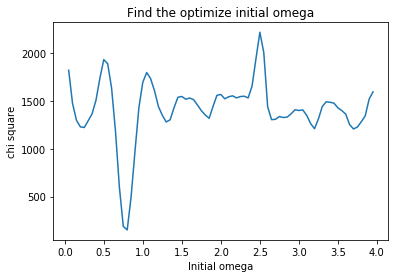

In [59]:
def best_omega(t, dt, uncertainty, A1, B1, C1, tao1, omega1):
    # This function will return chisqr for the given parameter
    dt_fit = oscDecay(t, A1, B1, C1, tao1, omega1)

    # Calculate residuals and reduced chi squared
    resids = dt - dt_fit
    return ((resids / uncertainty) ** 2).sum() 

# Define the optimized parameter again.
A0, B0, C0, tau0, omega0 = 25,0.36,8,25,0.77  # use the guessed data in (1) as initialization.
nlfit, nlpcov = curve_fit(oscDecay,t,dt,p0=[A0, B0, C0, tau0, omega0],sigma=uncertainty)
A, B, C, tao, omega = nlfit  # get the optimized parameter
chisqr = []
for omega in np.arange(0.05,4.00,0.05):
    chisqr.append(best_omega(t, dt, uncertainty, A, B, C, tao, omega))

plt.plot(np.arange(0.05,4.00,0.05),chisqr)
plt.xlabel('Initial omega')
plt.ylabel('chi square')
plt.title('Find the optimize initial omega')

5. A lot of technology, especially most types of digital audio devices for processing sound, is based on representing a signal of time as a sum of sine functions. Say the signal is some function $f (t)$ on the interval $[−\pi, \pi]$ (or generally $[a,b]$). Instead of working with $f (t)$ directly, we approximate f by the sum
    $$
    S_N(t)=\sum_{n=1}^Nb_n\sin(nt)
    $$
    where the coefficients $b_n$ must be adjusted such that $S_N(t)$ is a good approximation to $f (t)$. We shall in this exercise adjust bn by a trial-and-error process.

    (1) **Make** a function `sinesum(t, b)` that returns $S_N(t)$, given the coefficients $b_n$ in an array `b` and time coordinates in an array `t`. Note that if `t` is an array, the return value is also an array.
    
    (2) **Make** a function `plot_compare(f, N, M)` that plots the original function $f (t)$ together with the sum of sines $S_N(t)$, so that the quality of the approximation $S_N(t)$ can be examined visually. The argument `f` is a Python function implementing $f (t)$, `N` is the number of terms in the sum $S_N(t)$, and `M` is the number of uniformly distributed $t$ coordinates used to plot $f$ and $S_N$.
    
    (3) **Write** a function `error(b, f, M)` that returns a mathematical measure of the error in $S_N(t)$ as an approximation to $f (t)$:
    $$
    E =\sqrt{\displaystyle\sum_i\left[f(t_i)-S_N(t_i)\right]^2}
    $$
    where the $t_i$ values are $M$ uniformly distributed coordinates on $[−\pi, \pi]$. The array `b` holds the coefficients in $S_N$ and `f` is a Python function implementing the mathematical function $f (t)$.
    
    (4) **Make** a function `trial(f, N)` for interactively giving $b_n$ values and getting a plot on the screen where the resulting $S_N(t)$ is plotted together with $f (t)$. The error in the approximation should also be computed as indicated in part (3). The argument `f` is a Python function for $f (t)$ and `N` is the number of terms $N$ in the sum $S_N(t)$. The trial function can run a loop where the user is asked for the $b_n$ values in each pass of the loop and the corresponding plot is shown. You must find a way to terminate the loop when the experiments are over. Use $M=500$ in the calls to `plot_compare` and `error`. Choose $f (t)$ to be a straight line $f (t) = \cfrac{1}{\pi}t$ on $[−\pi, \pi]$. Call `trial(f, 3)` and try to find through  experimentation some values $b_1, b_2$, and $b_3$ such that the sum of sines $S_N(t)$ is a good approximation to the straight line.
    
    (5) **Now** we shall try to automate the procedure in part (4). Write a function that has three nested loops over values of $b_1, b_2$, and $b_3$. Let each loop cover the interval $[−1, 1]$ in steps of $0.1$. For each combination of $b_1, b_2$, and $b_3$, the error in the approximation $S_N$ should be computed. Use this to find, and print, the smallest error and the corresponding values of $b_1, b_2$, and $b_3$. Let the program also plot $f$ and the approximation $S_N$ corresponding to the smallest error.